In [ ]:
!pip install -Uqq fastai




In [ ]:
from fastai.vision.all import *
from fastai.callback.progress import CSVLogger


In [ ]:
path = untar_data(URLs.PETS)



In [ ]:
def is_cat(x):
    return x[0].isupper()

dls = ImageDataLoaders.from_name_func(
    path/"images",
    get_image_files(path/"images"),
    valid_pct=0.2,
    seed=42,
    label_func=is_cat,
    item_tfms=Resize(192),
    bs=32
)



In [ ]:
learn = vision_learner(dls, resnet18, metrics=accuracy)

# ✅ Remove ProgressCallback which creates NBMasterBar issue
learn.remove_cb(ProgressCallback)

# ✅ Instead use CSV Logger (safe)
learn.add_cb(CSVLogger())

learn.fine_tune(3)



[0, 0.16065996885299683, 0.05475432798266411, 0.981055498123169, '00:45']
[0, 0.11103123426437378, 0.062425751239061356, 0.9824086427688599, '00:37']
[1, 0.05783466249704361, 0.03165692090988159, 0.9905277490615845, '00:38']
[2, 0.029041005298495293, 0.016290264204144478, 0.9918808937072754, '00:37']


✅ Image: chihuahua_87.jpg
✅ Prediction: False
✅ Probability: 0.999901294708252


<Axes: >

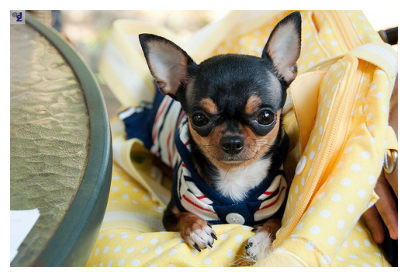

In [ ]:
img_path = get_image_files(path/"images")[0]
img = PILImage.create(img_path)

pred, pred_idx, probs = learn.predict(img)

print("✅ Image:", img_path.name)
print("✅ Prediction:", pred)
print("✅ Probability:", probs[pred_idx].item())

img.show()
